# @ The Sparks Foundation
# Name:Minal Gupta
# Task6

# Prediction using Decision Tree algorithm

Create Decision Tree classifier and visualize it graphically.
The aim is- if we feed any new data to this classifier ,it would be able to predict the right class accordingly.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Performing Exploratory data analysis(EDA) 

In [3]:
data.shape # for knowing the shape od data

(150, 6)

In [4]:
data.info() # for knowing the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe() # it will describe the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.dtypes #for checking data types of various features of our dataset

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

From this we conclude that all variables are of numeric type except our target variable i.e Species is of object type.

In [7]:
data.isna().sum() #for checking null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no null values in our dataset.

In [8]:
data['Species'].value_counts() # for knowing the frequency of distribution of Species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

From this, we can say that there is equal no. of tuples for all classes of Species, thus making balanced dataset.

In [9]:
data.min() # for checking noisy tuples in dataset by minimim value

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [10]:
data.max() #for knowing maximum value in dataset

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [11]:
data.mean(numeric_only=True) # for finding mean

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

Here, we are comparing minimum and maximum values with the corresponding mean value, there is no huge deviation.Thus, our dataset as noisy free.

#### **Now removing Id columnn from dataset**
As this column does not help in deciding the Species

In [12]:
data.drop(['Id'],inplace=True,axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualization

#### 1. Histogram

Text(0.5, 0.98, 'Feature Distribution Analysis of Iris Species')

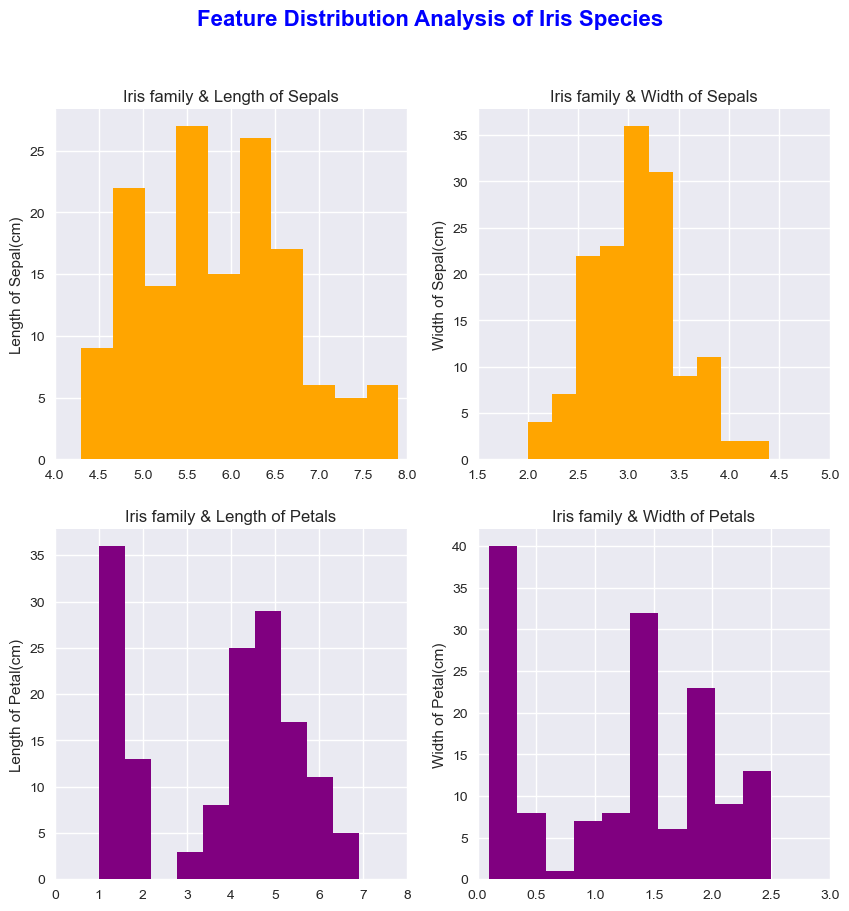

In [71]:
plt.style.use('seaborn')
fig, ((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax0.hist(data['SepalLengthCm'],color='orange')
ax0.set_xlim(4,8)
ax0.set(title="Iris family & Length of Sepals",ylabel="Length of Sepal(cm)")

ax1.hist(data['SepalWidthCm'],color='orange')
ax1.set_xlim(1.5,5)
ax1.set(title="Iris family & Width of Sepals",ylabel="Width of Sepal(cm)")

ax2.hist(data['PetalLengthCm'],color='purple')
ax2.set_xlim(0,8)
ax2.set(title="Iris family & Length of Petals",ylabel="Length of Petal(cm)")

ax3.hist(data['PetalWidthCm'],color='purple')
ax3.set_xlim(0,3)
ax3.set(title="Iris family & Width of Petals",ylabel="Width of Petal(cm)")

#  Adding title to figure

fig.suptitle('Feature Distribution Analysis of Iris Species',fontsize=16,fontweight="bold",color='blue')




#### 2. Scatter plot

Text(0.5, 1.0, 'Length vs Width of sepal')

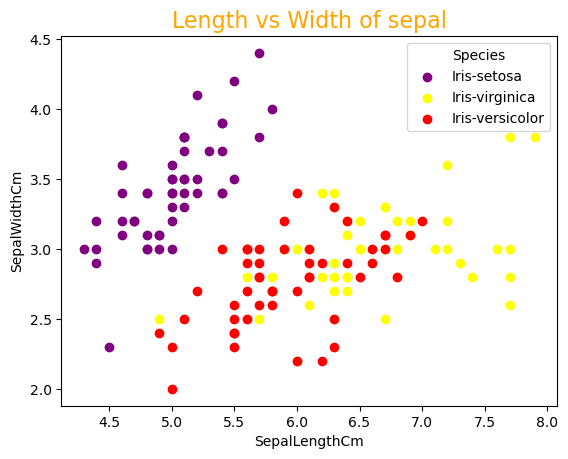

In [72]:
plt.style.use('default')
colors=['purple','yellow','red']
species=['Iris-setosa','Iris-virginica','Iris-versicolor']

for i in range(3):
    filter_species=data[data.Species==species[i]]
    plt.scatter(x=filter_species['SepalLengthCm'],y=filter_species['SepalWidthCm'],c=colors[i],label=species[i])
    
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(title='Species')
plt.title('Length vs Width of sepal',color='orange',fontsize=16)


Text(0.5, 1.0, 'Length vs Width of petal')

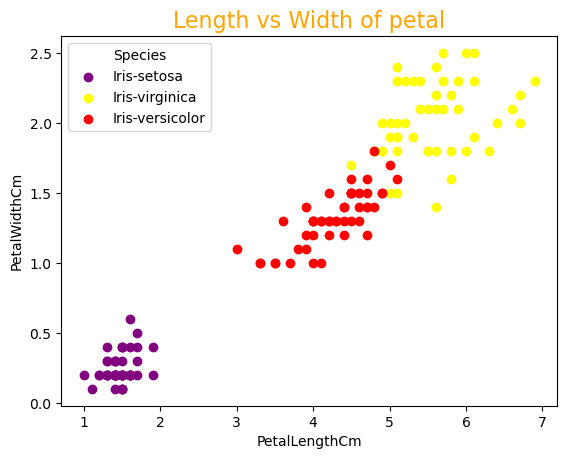

In [73]:
for i in range(3):
    filter_species=data[data.Species==species[i]]
    plt.scatter(x=filter_species['PetalLengthCm'],y=filter_species['PetalWidthCm'],c=colors[i],label=species[i])
    
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(title='Species')
plt.title('Length vs Width of petal',color='orange',fontsize=16)


Text(0.5, 1.0, 'Sepal Length vs Petal Length')

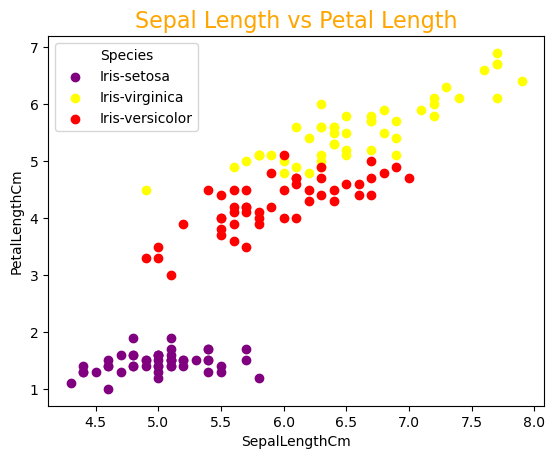

In [74]:
for i in range(3):
    filter_species=data[data.Species==species[i]]
    plt.scatter(x=filter_species['SepalLengthCm'],y=filter_species['PetalLengthCm'],c=colors[i],label=species[i])
    
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(title='Species')
plt.title('Sepal Length vs Petal Length',color='orange',fontsize=16)


Text(0.5, 1.0, 'SepalWidth vs PetalWidth')

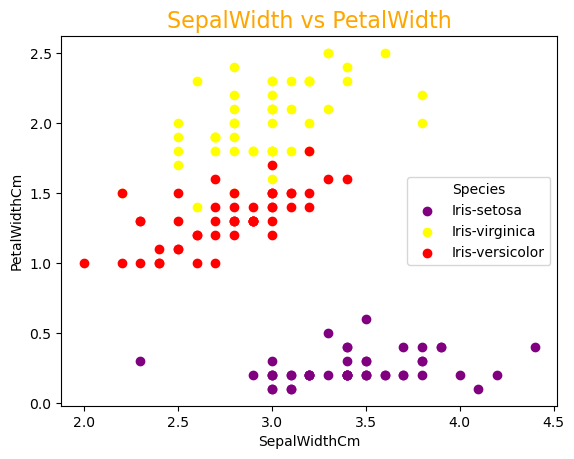

In [75]:
for i in range(3):
    filter_species=data[data.Species==species[i]]
    plt.scatter(x=filter_species['SepalWidthCm'],y=filter_species['PetalWidthCm'],c=colors[i],label=species[i])
    
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.legend(title='Species')
plt.title('SepalWidth vs PetalWidth',color='orange',fontsize=16)


#### 3. Correlation Matrix & HeatMap

In [30]:
cor=data.corr()
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 0.98, 'HeatMap')

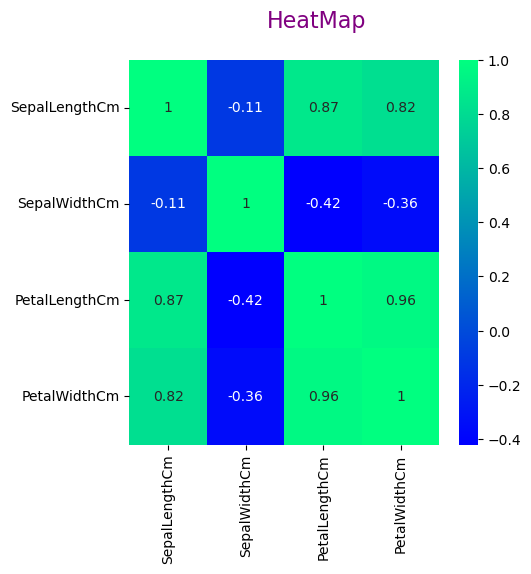

In [32]:
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cor,annot=True,ax=ax,cmap='winter')
fig.suptitle(t="HeatMap",color='purple',fontsize=16)

#### 4. Box Plot

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

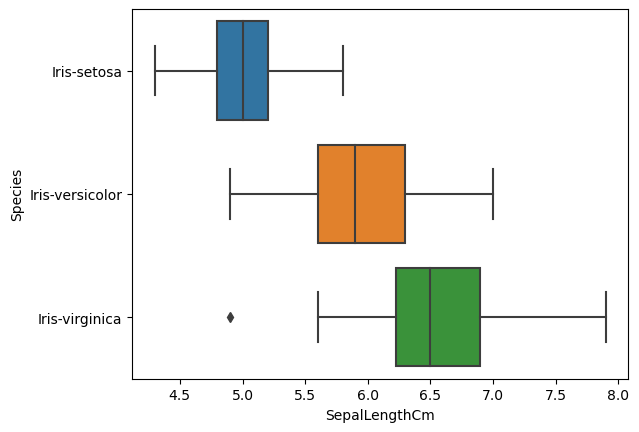

In [33]:
sns.boxplot(x='SepalLengthCm',y='Species',data=data)

#### 5. Pair Plot

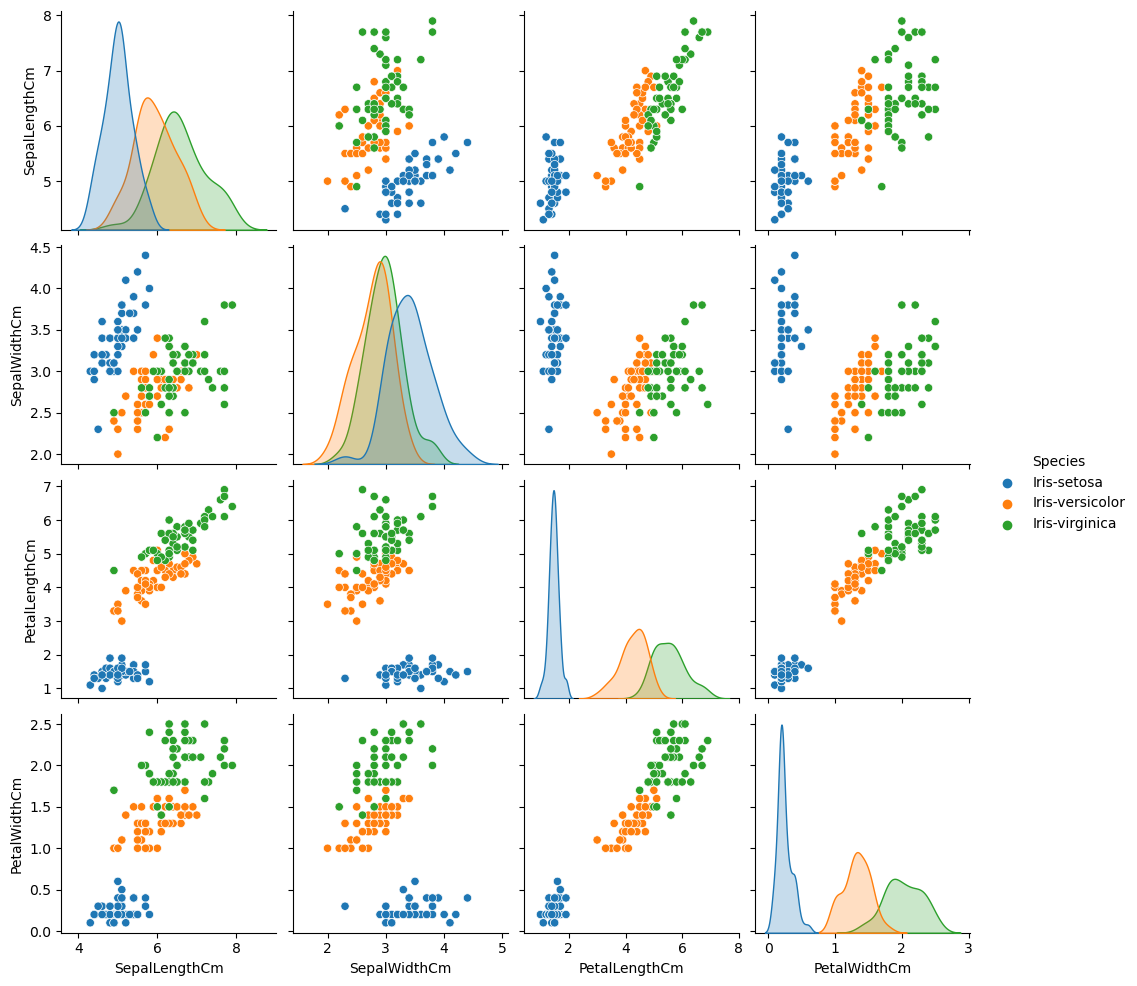

In [35]:
sns.pairplot(data=data,hue='Species')

#### **From this we conclude that Iris setosa species are linearly separable from other two species and remaining two species are not linearly separable from each other**

# Feature Engineering

In [36]:
# selecting 1 tuple of class Iris-setosa for prediction 
pred_data1=data.iloc[34]
pred_data1

SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 34, dtype: object

In [37]:
# selecting 1 tuple of class Iris-versicolor for prediction 
pred_data2=data.iloc[78]
pred_data2

SepalLengthCm                6.0
SepalWidthCm                 2.9
PetalLengthCm                4.5
PetalWidthCm                 1.5
Species          Iris-versicolor
Name: 78, dtype: object

In [38]:
# selecting 1 tuple of class Iris-virginica for prediction 
pred_data3=data.iloc[140]
pred_data3

SepalLengthCm               6.7
SepalWidthCm                3.1
PetalLengthCm               5.6
PetalWidthCm                2.4
Species          Iris-virginica
Name: 140, dtype: object

In [40]:
data.shape

(150, 5)

Removing these three tuples from dataset

In [41]:
data.drop([34,78,140],inplace=True)
data.shape

(147, 5)

In [42]:
# Making two feature i.e x and y
X=data.drop("Species",axis=1)
y=data['Species']

In [43]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [46]:
X.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [47]:
y.dtypes

dtype('O')

From this we can say that X contains all numerical value whereas y contains categorical value, so y must be encoded into numerical value.

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Encoded Species"]=le.fit_transform(y.ravel())
y=le.fit_transform(y.ravel())
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [51]:
Encoded_class=pd.DataFrame({'Species':["Iris-setosa","Iris-versicolor","Iris-virginica"],'Encoded':[0,1,2]})
Encoded_class

,Species,Encoded
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


# Preparing Train & Test data and fitting the model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(65)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=DecisionTreeClassifier(criterion="gini",min_samples_split=2)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
print(f"Model Accuracy on test data={score*100:.2f}%")

Model Accuracy on test data=96.67%


# Model Evaluation

Metrics used for evaluation-a) Classification Report
                             b) Confusion Matrix
                              c)Accuracy Score


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=clf.predict(X_test)
print(f"Classification Report :\n\n{classification_report(y_test,y_pred)}")

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [56]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n\n{cf_matrix}")

Confusion Matrix:

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]


# Visualizing Confusion Matrix

[Text(0.5, 14.722222222222216, 'Predicted Label'),
 Text(45.722222222222214, 0.5, 'Actual Label')]

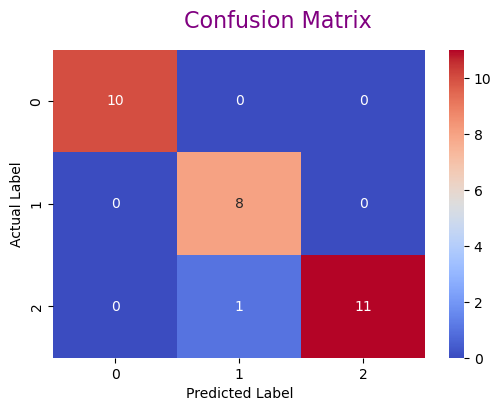

In [57]:
fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix,annot=True,cmap='coolwarm')
fig.suptitle(t="Confusion Matrix",color="purple",fontsize=16)
ax.set(xlabel="Predicted Label",ylabel="Actual Label")

In [58]:
print(f"Accuracy Score:\n\n{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Score:

96.67%


# Visualizing our Decision Tree

[Text(0.5416666666666666, 0.9285714285714286, 'Petal Length <= 2.35\ngini = 0.666\nsamples = 117\nvalue = [39, 41, 37]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'Petal Width <= 1.75\ngini = 0.499\nsamples = 78\nvalue = [0, 41, 37]'),
 Text(0.4166666666666667, 0.6428571428571429, 'Petal Length <= 5.35\ngini = 0.13\nsamples = 43\nvalue = [0, 40, 3]'),
 Text(0.3333333333333333, 0.5, 'Sepal Length <= 4.95\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'Sepal Width <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'Sepal Width <= 2.25\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'Petal Length

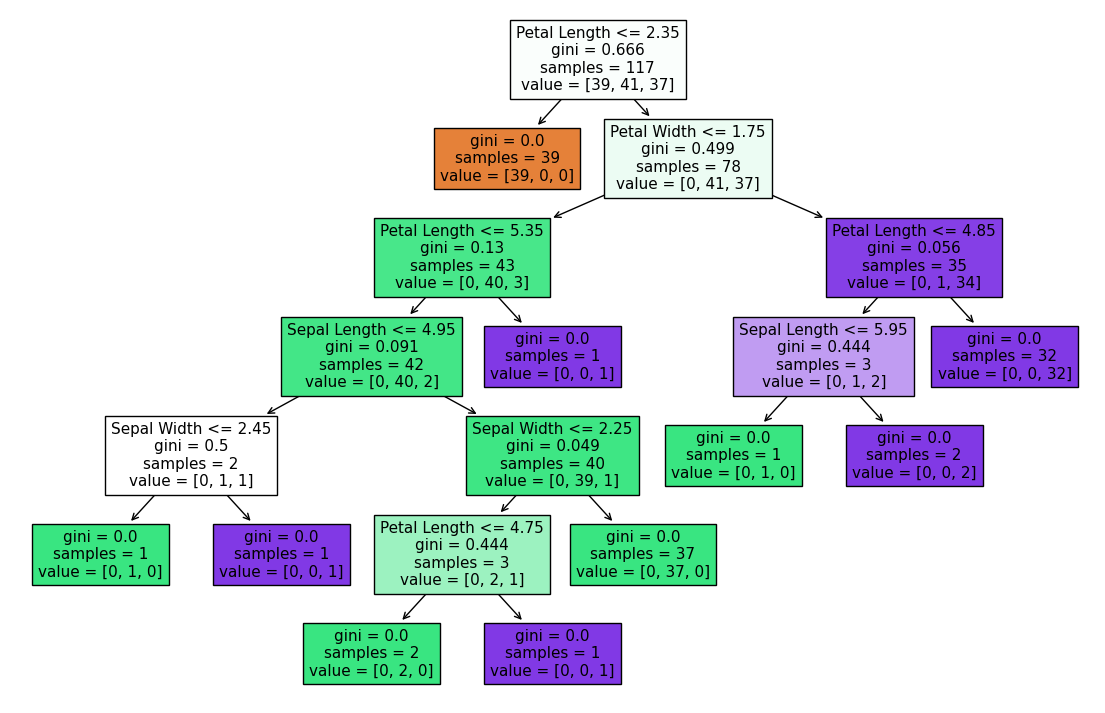

In [60]:
from sklearn import tree
plt.figure(figsize=(14,9))
tree.plot_tree(clf,filled=True,feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Performing Prediction on unseen data
Prediction on the tuples which have stored earlier

In [62]:
# prediction on data 1 , Species=Iris-setosa
pred_x1=pd.DataFrame(np.array([4.9,3.1,1.5,0.1]).reshape(1,-1),columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y1=clf.predict(pred_x1)
pred_class1=Encoded_class[Encoded_class["Encoded"]==pred_y1[0]]["Species"].item()
print(f"Predicted class by model on pred_data1:{pred_class1}")


Predicted class by model on pred_data1:Iris-setosa


In [64]:
# prediction on data 2 , Species=Iris-versicolor
pred_x1=pd.DataFrame(np.array([6.0,2.9,4.5,1.5]).reshape(1,-1),columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y1=clf.predict(pred_x1)
pred_class1=Encoded_class[Encoded_class["Encoded"]==pred_y1[0]]["Species"].item()
print(f"Predicted class by model on pred_data1:{pred_class1}")


Predicted class by model on pred_data1:Iris-versicolor


In [66]:
# prediction on data 3 , Species=Iris-virginica
pred_x1=pd.DataFrame(np.array([6.7,3.1,5.6,2.4]).reshape(1,-1),columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y1=clf.predict(pred_x1)
pred_class1=Encoded_class[Encoded_class["Encoded"]==pred_y1[0]]["Species"].item()
print(f"Predicted class by model on pred_data1:{pred_class1}")


Predicted class by model on pred_data1:Iris-virginica


# Saving the model and loading it

In [67]:
import pickle
pickle.dump(clf,open("decision_tree_model.pkl","wb")) # dump()saves our trained model in same directory of this file

In [68]:
loaded_model=pickle.load(open("decision_tree_model.pkl","rb"))
loaded_model.score(X_test,y_test)

0.9666666666666667